In [1]:
using LinearAlgebra
using Random
using Plots
using JLD2

In [2]:
A = [-1/3 4/3; 4/3 -1/3] # Matrix used to skew data.
n = 150 # Number of data points in each class.
N = n * 2 # Total number of data points.

X_pos = A * rand(Float64, (2, n))
X_neg = -A * rand(Float64, (2, n))

X = hcat(X_pos, X_neg)
T = hcat(ones(1, n), zeros(1, n))

1×300 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [3]:
# @save "data/perceptron.jld2" A n N X_pos X_neg X T
@load "data/perceptron.jld2" A n N X_pos X_neg X T

7-element Array{Symbol,1}:
 :A
 :n
 :N
 :X_pos
 :X_neg
 :X
 :T

In [4]:
lightred = colorant"#f4ccccff"
blue = colorant"#4a86e8ff"
red = colorant"#e06666ff"
lightblue = :lightblue1

function scatter_2d(x1, x2, c; reuse=false, kwargs...)
    f = reuse ? scatter! : scatter
    
    return f(
        x1,
        x2;
        marker=(c, 5, Plots.stroke(0)),
        legend=false,
        kwargs...
    )
end

function scatter_2d!(args...; kwargs...)
    return scatter_2d(args...; reuse=true, kwargs...)
end

scatter_2d! (generic function with 1 method)

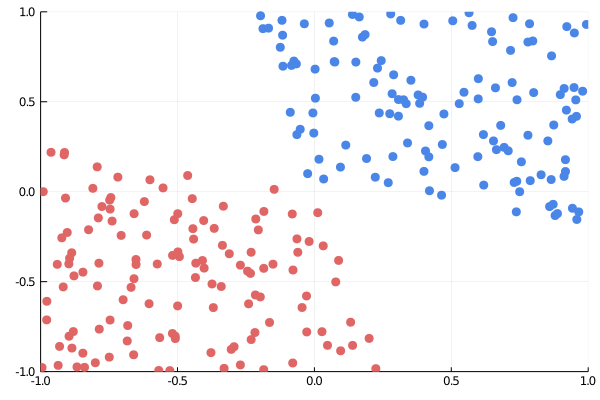

In [5]:
scatter_2d(X_pos[1, :], X_pos[2, :], blue; xlim=(-1, 1), ylim=(-1, 1))
scatter_2d!(X_neg[1, :], X_neg[2, :], red)

In [6]:
Base.@kwdef mutable struct Perceptron
    w::Array{Float64, 1}
    η::Float64 # Learning rate.
end

p = Perceptron(w=[1, -1], η=0.0002)

Perceptron([1.0, -1.0], 0.0002)

In [7]:
function train!(p::Perceptron, x::Array{Float64, 1}, t::Float64)
    z = p.w ⋅ x
    y = z ≥ 0 ? 1 : 0
    k = p.η * (t - y)
    p.w += k * x
end

train! (generic function with 1 method)

In [8]:
# The domain over which we'll evaluate the Perceptron output.
x1 = x2 = range(-1, 1; length=512)

forward(x1, x2) = p.w ⋅ [x1, x2] > 0 ? 1 : 0

forward (generic function with 1 method)

In [9]:
function binary_contourf(x1, x2, f, c; reuse=false, kwargs...)
    g = reuse ? contourf! : contourf
    
    return g(
        x1,
        x2,
        f;
        legend=false,
        levels=2,
        color=c,
        line=0,
        kwargs...
    )
end

function binary_contourf!(args...; kwargs...)
    binary_contourf(args...; reuse=true, kwargs...)
end

binary_contourf! (generic function with 1 method)

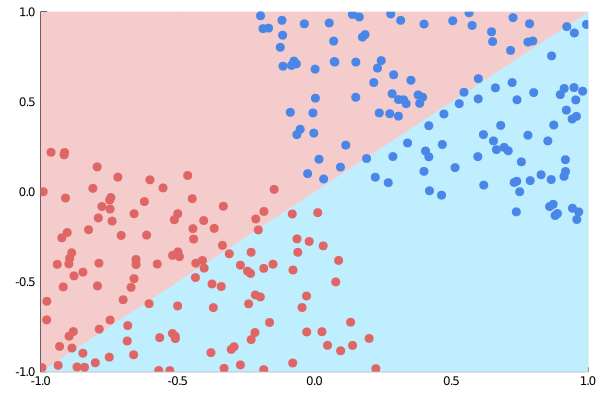

In [10]:
function plot_decision_boundary(; kwargs...)
    binary_contourf(x1, x2, forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1), kwargs...)
    scatter_2d!(X_pos[1, :], X_pos[2, :], blue)
    scatter_2d!(X_neg[1, :], X_neg[2, :], red)
end

plot_decision_boundary()

┌ Info: Saved animation to 
│   fn = /Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif
└ @ Plots /Users/tyronjung/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif")
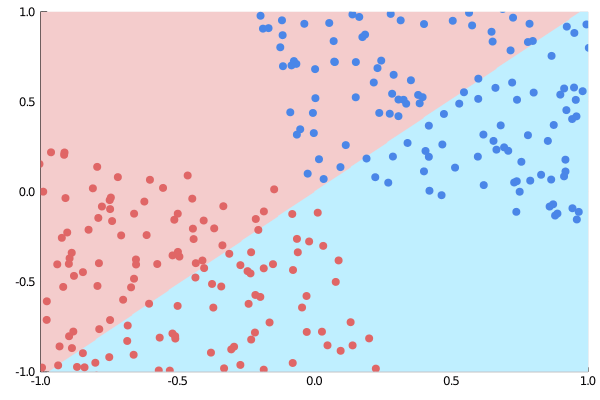

In [11]:
epochs = 1000

@gif for e in 1:epochs
    changed = false
    
    for i in randperm(N)
        x = X[:, i]
        t = T[1, i]
        
        if !changed && forward(x...) ≠ t
            changed = true
        end
        
        train!(p, x, t)
    end
    
    if !changed
        break
    end
    
    plot_decision_boundary()
end

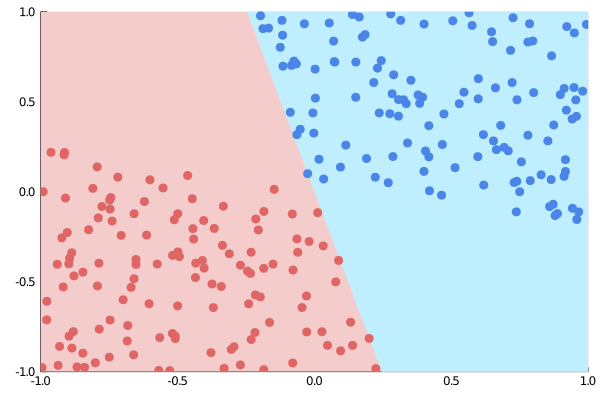

In [12]:
plot_decision_boundary()

In [13]:
p = Perceptron(w=[1, -1], η=0.02)

N = n * 2 + 2

X_neg_aug = hcat(X_neg, A * [-0.25 0.5; 0.5 -0.25])

X = hcat(X_pos, X_neg_aug)
T = hcat(ones(1, n), zeros(1, n + 2))

1×302 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

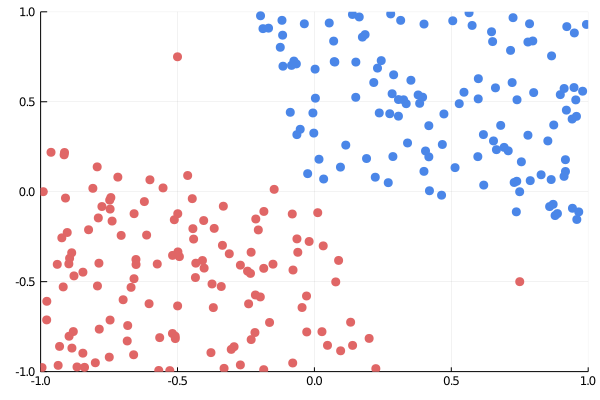

In [14]:
scatter_2d(X_pos[1, :], X_pos[2, :], blue; xlim=(-1, 1), ylim=(-1, 1))
scatter_2d!(X_neg_aug[1, :], X_neg_aug[2, :], red)

┌ Info: Saved animation to 
│   fn = /Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif
└ @ Plots /Users/tyronjung/.julia/packages/Plots/LWw1t/src/animation.jl:104


Plots.AnimatedGif("/Users/tyronjung/Desktop/deep_learning/perceptron/tmp.gif")
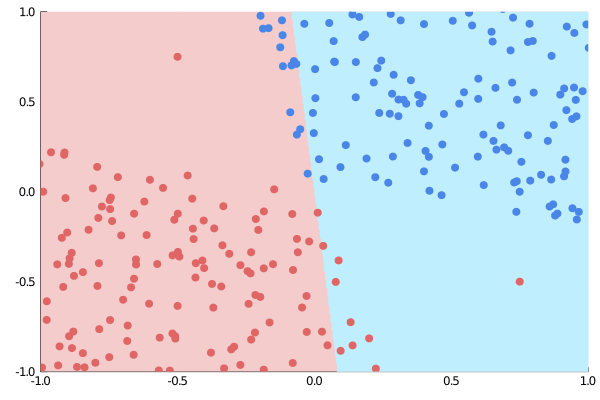

In [15]:
epochs = 200

@gif for e in 1:epochs
    changed = false
    
    for i in randperm(N)
        x = X[:, i]
        t = T[1, i]
        
        if !changed && forward(x...) ≠ t
            changed = true
        end
        
        train!(p, x, t)
    end
    
    if !changed
        break
    end
    
    binary_contourf(x1, x2, forward, [lightred, lightblue]; xlim=(-1, 1), ylim=(-1, 1))
    scatter_2d!(X_pos[1, :], X_pos[2, :], blue)
    scatter_2d!(X_neg_aug[1, :], X_neg_aug[2, :], red)
end